In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

c:\Users\aman2\OneDrive\Desktop\Git repo\CADCS---Charging-Time-Prediction-for-Battery-Electric-Vehicles-BEVs-using-Time-Series-Methods\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 2/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.0306e-04 - val_loss: 7.8588e-04
Epoch 5/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7.4396e-04 - val_loss: 6.3172e-04
Epoch 6/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.3935e-04 - val_loss: 4.6554e-04
Epoch 7/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.9731e-04 - val_loss: 3.7086e-04
Epoch 8/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 3.1867e-04 - val_loss: 3.1439e-04
Epoch 9/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.5931e-04 - val_loss: 2.6626e-04
Epoch 10/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.3866e-04 - val_loss: 2.0676e-04
Epoch 11/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 

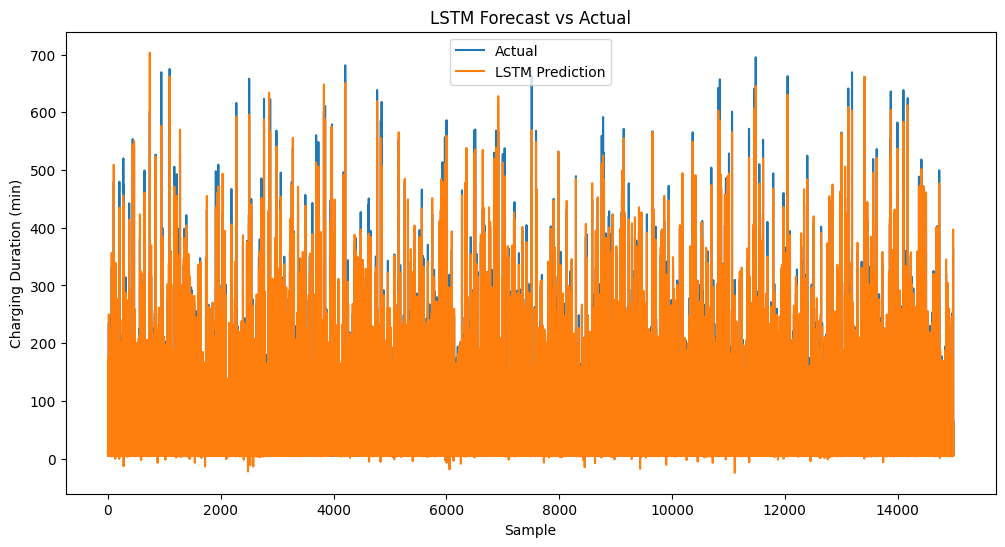

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reshape for LSTM: (samples, timesteps, features)
# Here, timesteps=1 (can be increased for sequence modeling)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train_lstm, y_train_scaled, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# Predict
y_pred_scaled = model.predict(X_test_lstm)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# Evaluate
mse = mean_squared_error(y_test_inv, y_pred)
mae = mean_absolute_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R2 Score: {r2:.2f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='LSTM Prediction')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Charging Duration (min)')
plt.title('LSTM Forecast vs Actual')
plt.show()

In [21]:
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError

# === Build and Compile the LSTM model ===
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss=MeanSquaredError())  # ✅ Avoid using 'mse' string

# === Train the model ===
history = model.fit(X_train_lstm, y_train_scaled, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# === Predict and Evaluate ===
y_pred_scaled = model.predict(X_test_lstm)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

mse = mean_squared_error(y_test_inv, y_pred)
mae = mean_absolute_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# === Save model and other components ===

# Step 1: Save model to .h5
model_path = "../Saving The Model Results/LSTM_model.h5"
model.save(model_path)

# Step 2: Save scalers and metrics to .pkl
results = {
    "model_path": model_path,
    "scaler_X": scaler_X,
    "scaler_y": scaler_y,
    "mse": mse,
    "mae": mae,
    "r2": r2
}

pkl_path = "../Saving The Model Results/LSTM_model_results.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(results, f)


Epoch 1/30


c:\Users\aman2\OneDrive\Desktop\Git repo\CADCS---Charging-Time-Prediction-for-Battery-Electric-Vehicles-BEVs-using-Time-Series-Methods\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1687/1687 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 2/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 9.2320e-04 - val_loss: 9.3291e-04
Epoch 5/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.1061e-04 - val_loss: 7.5625e-04
Epoch 6/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.3036e-04 - val_loss: 4.5270e-04
Epoch 7/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.1501e-04 - val_loss: 4.0169e-04
Epoch 8/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.3181e-04 - val_loss: 2.7790e-04
Epoch 9/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.7425e-04 - val_loss: 2.8996e-04
Epoch 10/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.1481e-04 - val_loss: 2.2463e-04
Epoch 11/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2.0755e-04 

In [22]:
import pickle
from tensorflow.keras.models import load_model

# === Step 1: Load the .pkl file containing scalers and metadata ===
pkl_path = "../Saving The Model Results/LSTM_model_results.pkl"
with open(pkl_path, "rb") as f:
    saved_data = pickle.load(f)

# === Step 2: Load the actual LSTM model using the saved path ===
model = load_model(saved_data["model_path"])

# === Step 3: Load the scalers and evaluation results ===
scaler_X = saved_data["scaler_X"]
scaler_y = saved_data["scaler_y"]
mse = saved_data["mse"]
mae = saved_data["mae"]
r2 = saved_data["r2"]

# === Step 4: Print or reuse the restored components ===
print(f"Restored Model from: {saved_data['model_path']}")
print(f"Restored Test MSE: {mse:.2f}")
print(f"Restored Test MAE: {mae:.2f}")
print(f"Restored Test R²: {r2:.2f}")


Restored Model from: ../Saving The Model Results/LSTM_model.h5
Restored Test MSE: 57.98
Restored Test MAE: 4.61
Restored Test R²: 0.99
